<a href="https://colab.research.google.com/github/sashikiran-76/Binary_classifier-numercial_data-/blob/main/Binary_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
#CELL 1
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

In [2]:
#CELL 2

from sklearn.model_selection import train_test_split, cross_val_score, learning_curve
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, recall_score, classification_report, confusion_matrix, precision_score, f1_score


In [3]:
#CELL 3

from google.colab import drive
drive.mount('/content/drive')
!ls 

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
drive  sample_data


In [9]:
#CELL 4

!ls "/content/drive/MyDrive/Arya_DataScientist_Assignment.zip (Unzipped Files)/"

Resaved_training_set.csv  test_set.csv	training_set.csv


In [10]:
#CELL 5

training_file_path = "/content/drive/MyDrive/Arya_DataScientist_Assignment.zip (Unzipped Files)/training_set.csv"
test_file_path = "/content/drive/MyDrive/Arya_DataScientist_Assignment.zip (Unzipped Files)/test_set.csv"
print (training_file_path)

/content/drive/MyDrive/Arya_DataScientist_Assignment.zip (Unzipped Files)/training_set.csv


In [11]:
#CELL 6

data = pd.read_csv(training_file_path)
data.shape
data = data.drop('Unnamed: 0', axis=1)

data.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,X44,X45,X46,X47,X48,X49,X50,X51,X52,X53,X54,X55,X56,X57,Y
0,0.00,0.00,4.34,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.000,0.0,1.342,0.000,0.000,1.200,2,12,0
1,0.00,0.56,0.56,0.00,1.12,0.56,2.25,0.00,0.0,0.56,0.0,0.56,0.0,0.00,0.0,0.00,0.00,0.56,3.38,0.0,1.12,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.56,0.0,0.0,0.0,0.0,0.083,0.0,0.503,0.000,0.083,16.304,148,375,1
2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.00,0.00,8.10,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.70,0.0,0.0,0.0,0.0,0.000,0.0,0.000,0.000,0.000,1.000,1,5,0
3,0.64,0.00,0.64,0.00,1.93,0.00,0.00,0.00,0.0,0.00,0.0,1.29,0.0,0.00,0.0,1.29,0.64,0.00,1.93,0.0,2.58,0.0,0.64,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.000,0.0,0.462,0.370,0.000,2.440,22,122,1
4,0.58,0.00,0.00,35.46,0.58,0.00,0.58,0.58,0.0,0.00,0.0,0.00,0.0,0.58,0.0,0.58,0.58,0.58,0.58,0.0,1.74,0.0,0.00,1.16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.000,0.0,0.239,0.239,0.000,3.338,123,207,1


EXPLORATORY DATA ANALYSIS 
# Since the features or predictors are quantitative in nature, Scatter Plots and Numerical summaries inclusive of the correlation coefficient are effective means to get a crisp understanding of the data distribution

In [12]:
#CELL 7
"""
desciptive statistics on training data set before splitting into train and validation sets
"""
data.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,X44,X45,X46,X47,X48,X49,X50,X51,X52,X53,X54,X55,X56,X57,Y
count,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000
mean,0.102990,0.206419,0.284419,0.062074,0.311309,0.095974,0.112320,0.106041,0.091146,0.244345,0.060808,0.553685,0.094113,0.057205,0.048545,0.246598,0.142780,0.185514,1.660939,0.083880,0.818253,0.112113,0.101343,0.095199,0.565790,0.266668,0.757120,0.125312,0.100320,0.105274,0.065859,0.046563,0.094281,0.047409,0.108414,0.094258,0.134980,0.013463,0.080286,0.065077,0.044959,0.139182,0.047609,0.081987,0.313151,0.182662,0.006054,0.033281,0.037493,0.139252,0.015876,0.272971,0.077820,0.043828,5.047150,52.338107,283.059079,0.392327
std,0.296322,1.253828,0.504352,1.369361,0.656195,0.261455,0.389516,0.398694,0.271417,0.667065,0.203018,0.876412,0.303433,0.307892,0.255293,0.799327,0.444164,0.526497,1.760214,0.439199,1.210078,0.990195,0.345887,0.443482,1.733593,0.892676,3.321562,0.545827,0.608313,0.464483,0.409316,0.321900,0.538145,0.322958,0.551546,0.395220,0.409085,0.215280,0.423936,0.346739,0.375329,0.800478,0.231074,0.652636,1.063868,0.944817,0.081662,0.301611,0.235054,0.276309,0.083600,0.858634,0.256991,0.452862,31.397035,204.445218,578.339858,0.488331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.580750,6.000000,35.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.140000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.310000,0.000000,0.235000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.066000,0.000000,0.000000,0.000000,0.000000,2.263500,15.000000,94.000000,0.000000
75%,0.000000,0.000000,0.430000,0.000000,0.387500,0.000000,0.000000,0.000000,0.000000,0.170000,0.000000,0.820000,0.000000,0.000000,0.000000,0.110000,0.000000,0.000000,2.637500,0.000000,1.270000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.120000,0.000000,0.000000,0.00000

In Cell 7, we see that the some features/variables such as X1, X3, X5 etc have very low maximum values wheraes some like X56 and X57 have very high maximum values. To deal with this, standardisation as defined in cell 18 is done to bring all the features into a standard normal distribution

In [13]:
#CELL 8
"""
check for null values
"""

pd.isnull(data).sum()


X1     0
X2     0
X3     0
X4     0
X5     0
X6     0
X7     0
X8     0
X9     0
X10    0
X11    0
X12    0
X13    0
X14    0
X15    0
X16    0
X17    0
X18    0
X19    0
X20    0
X21    0
X22    0
X23    0
X24    0
X25    0
X26    0
X27    0
X28    0
X29    0
X30    0
X31    0
X32    0
X33    0
X34    0
X35    0
X36    0
X37    0
X38    0
X39    0
X40    0
X41    0
X42    0
X43    0
X44    0
X45    0
X46    0
X47    0
X48    0
X49    0
X50    0
X51    0
X52    0
X53    0
X54    0
X55    0
X56    0
X57    0
Y      0
dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


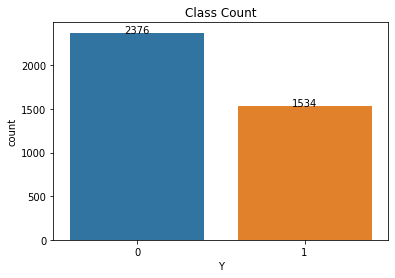

In [14]:
#CELL 9

"""
checking class balance
"""
values = data['Y'].value_counts()

ax = sns.countplot(data['Y'], x='classes')
ax.set_title ('Class Count')
for i, patch in enumerate(ax.patches):
    height = patch.get_height()
    ax.text(patch.get_x()+patch.get_width()/2., height + 0.1, values[i],ha="center")



Classes are not heavily imbalanced and so no methods have been applied to balance datasets. Penalising methods in classification models have been described such that the class weights are balanced in inverse proportion to the class frequency

In [36]:
#CELL 10

def heatmap_from_corrmatrix(dataset):
  """
  Plots a heatmap from correlation matrix of a dataframe

    Arguments:
          dataset : data on which correlation is to be computed for heatmap(type:dataframe)
            
    Returns:
          none
  """
  plt.figure()
  corr_matrix = dataset.corr() 
  f, ax = plt.subplots(figsize=(12, 9)) 	
  sns.heatmap(corr_matrix, vmax=1.0, vmin=-1.0, square=True) 	
  


<Figure size 432x288 with 0 Axes>

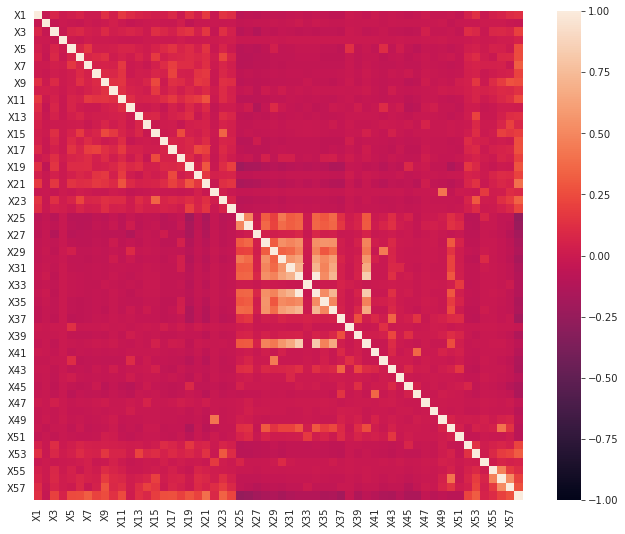

In [37]:
#CELL 11
"""
function call to generate heatmap 
"""
heatmap_from_corrmatrix(data)

Most of the features are significantly correlated but it appears like some features are redundant and can be removed during pre-processing before being used for classification

<Figure size 1152x1152 with 0 Axes>

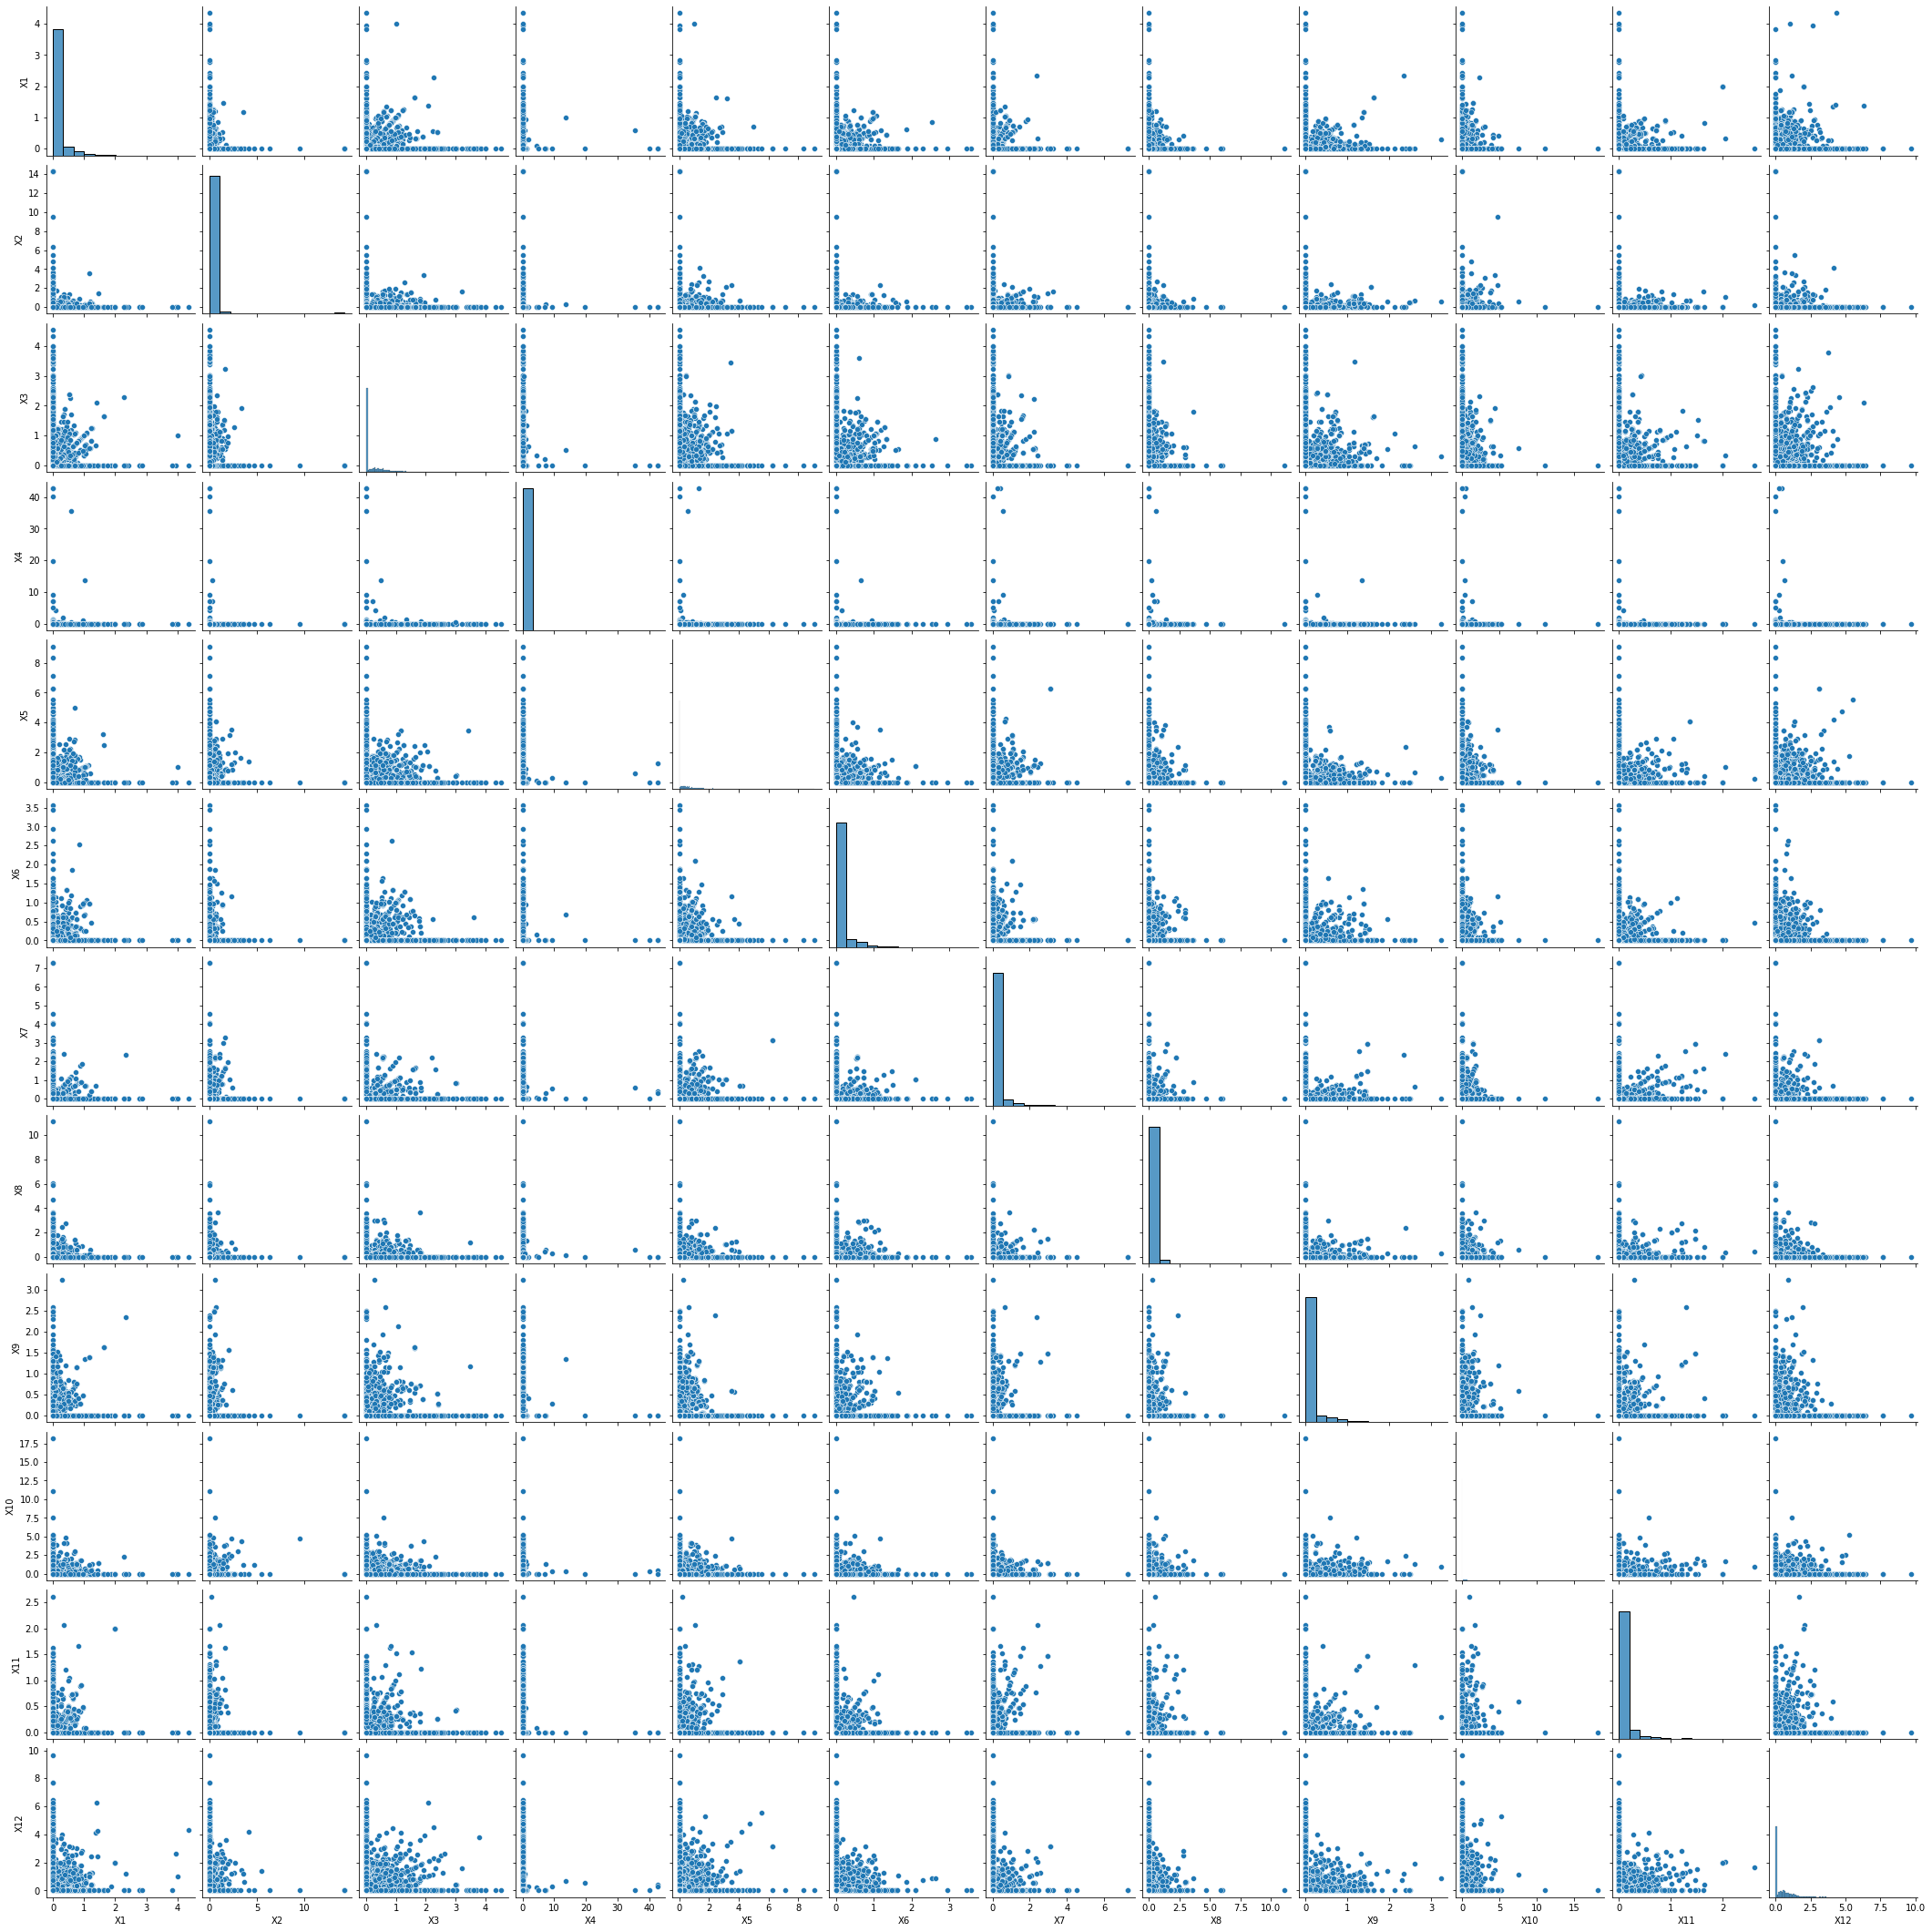

In [12]:
#CELL 12

""" scatter plots for visual correlation analysis for features X1 to X12 """

fig1 = plt.figure(figsize=(16,16));
sns.pairplot(data.iloc[:, 0:12],palette='Set1');



<Figure size 1152x1152 with 0 Axes>

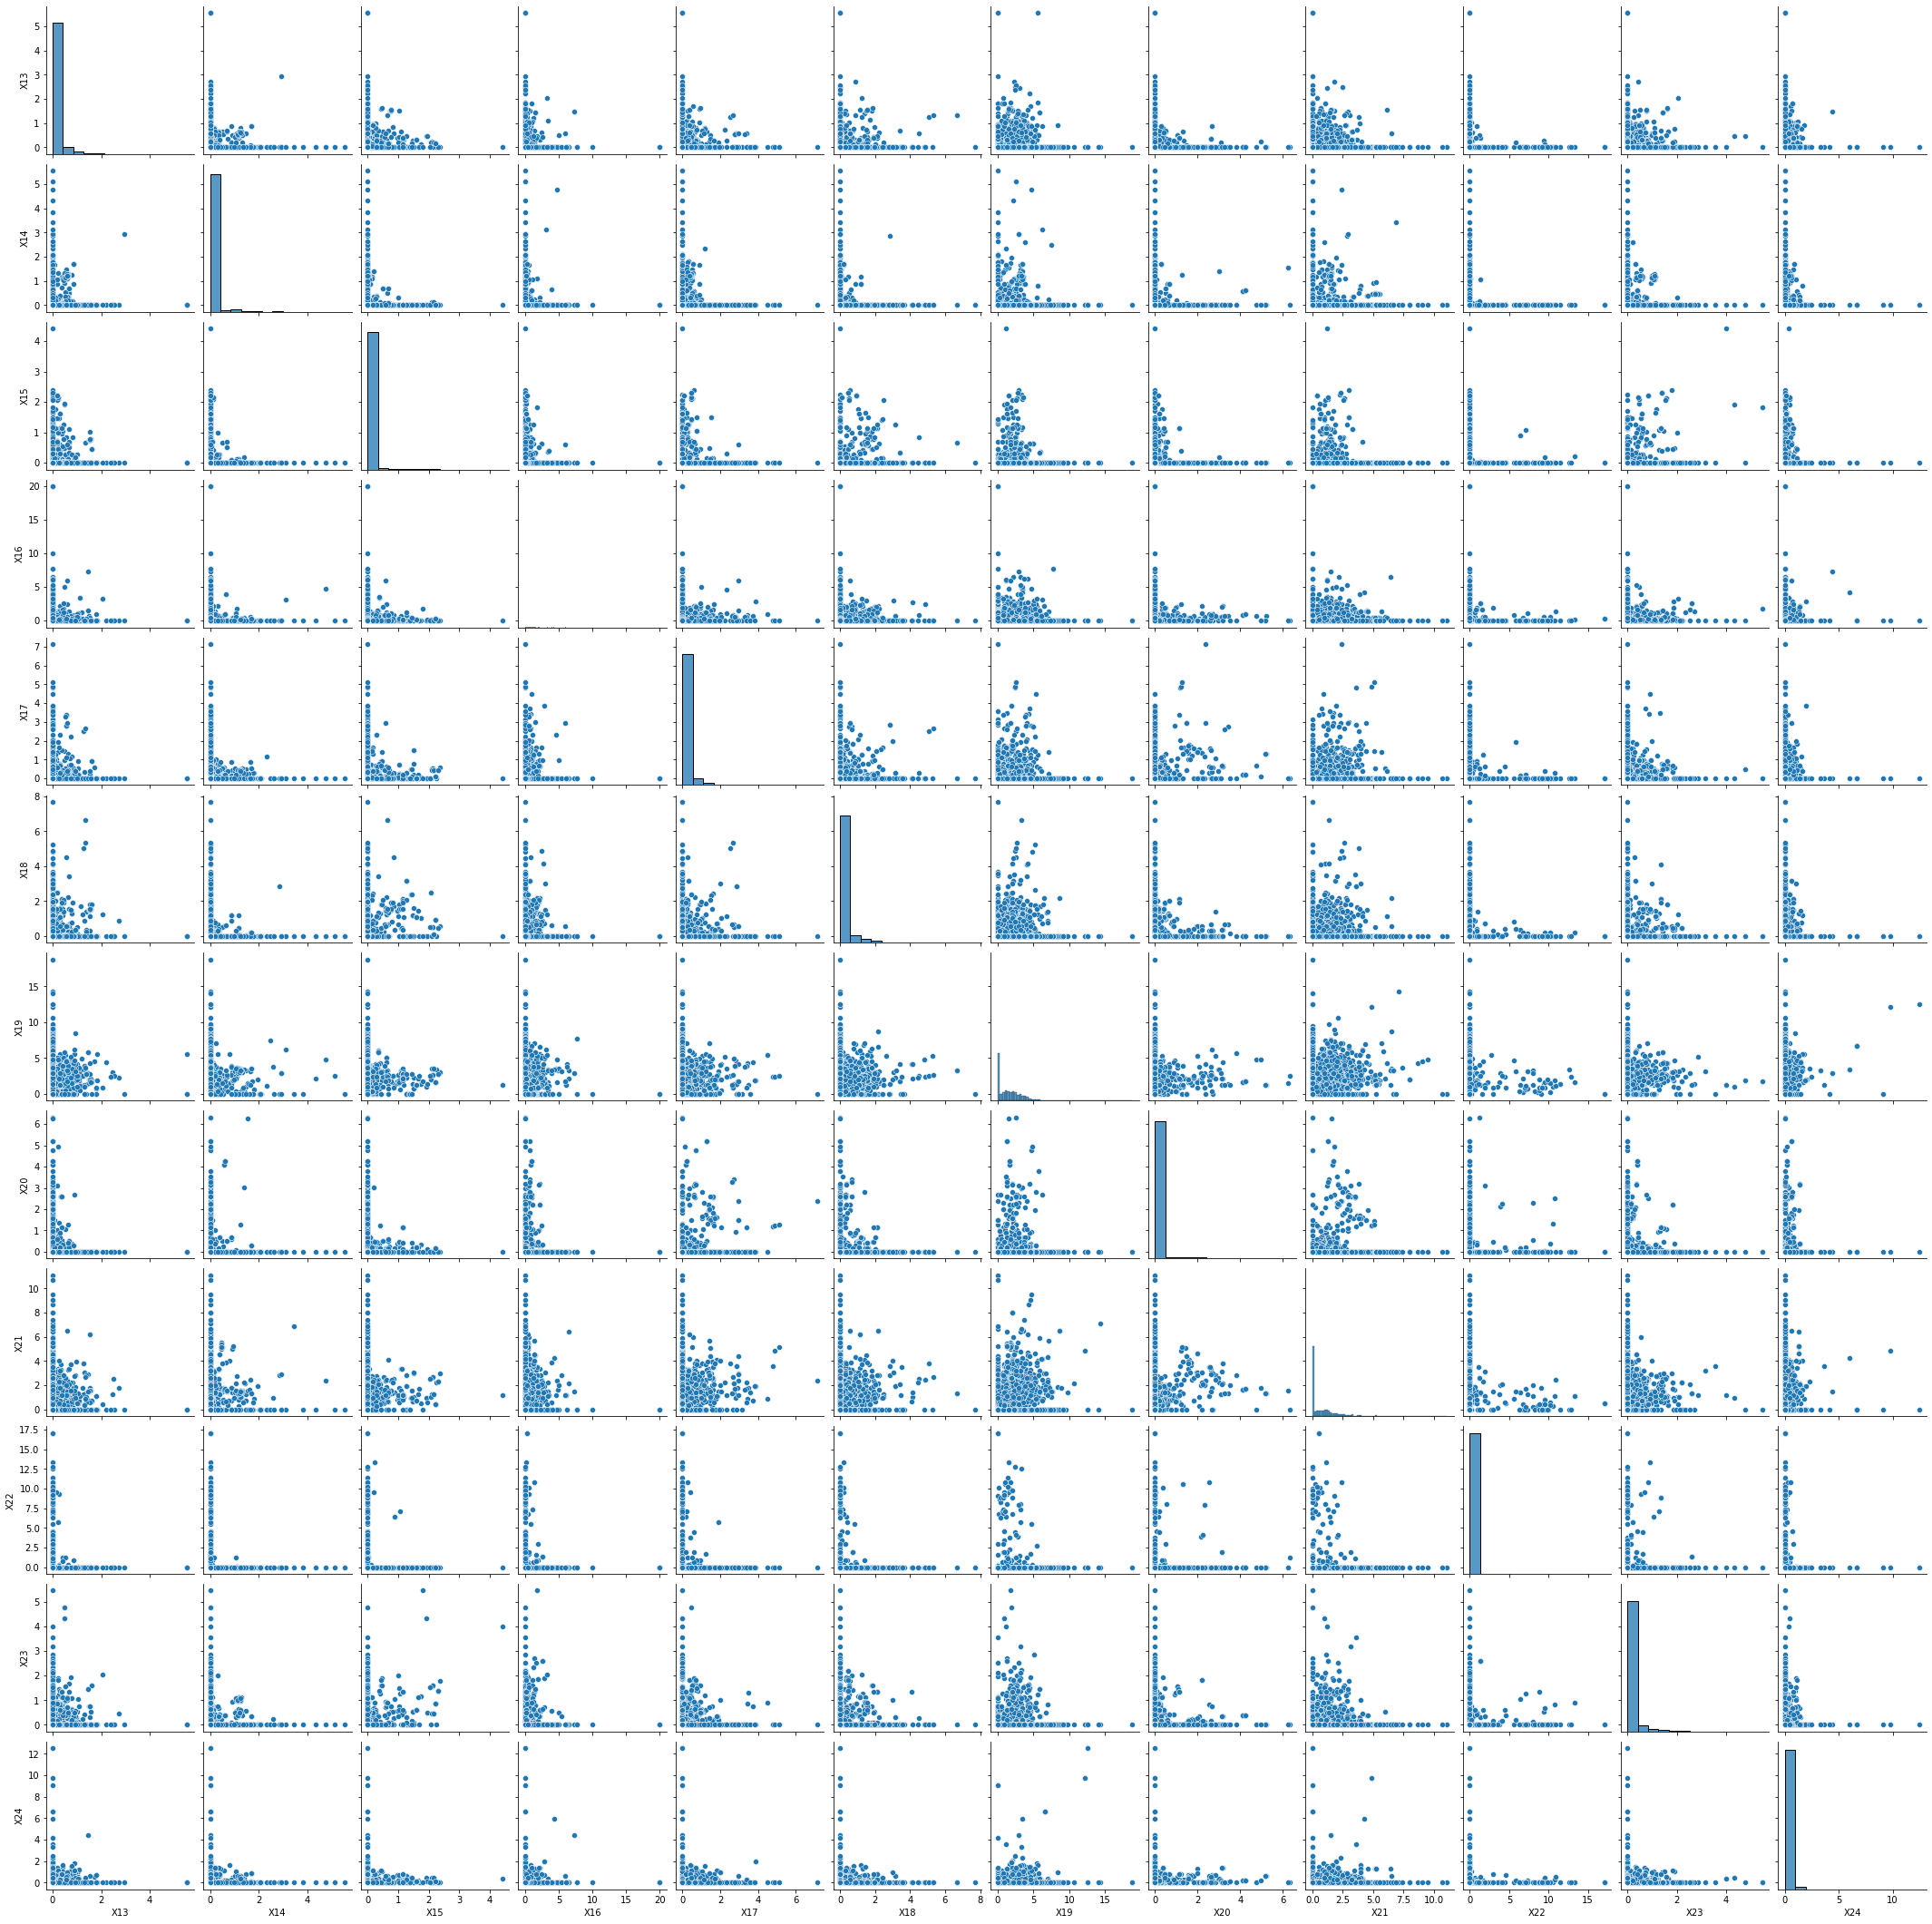

In [13]:
#CELL 13

""" scatter plots for visual correlation analysis for features X13 to X24 """

fig2 = plt.figure(figsize=(16,16));
sns.pairplot(data.iloc[:, 12:24],palette='Set2');



<Figure size 1152x1152 with 0 Axes>

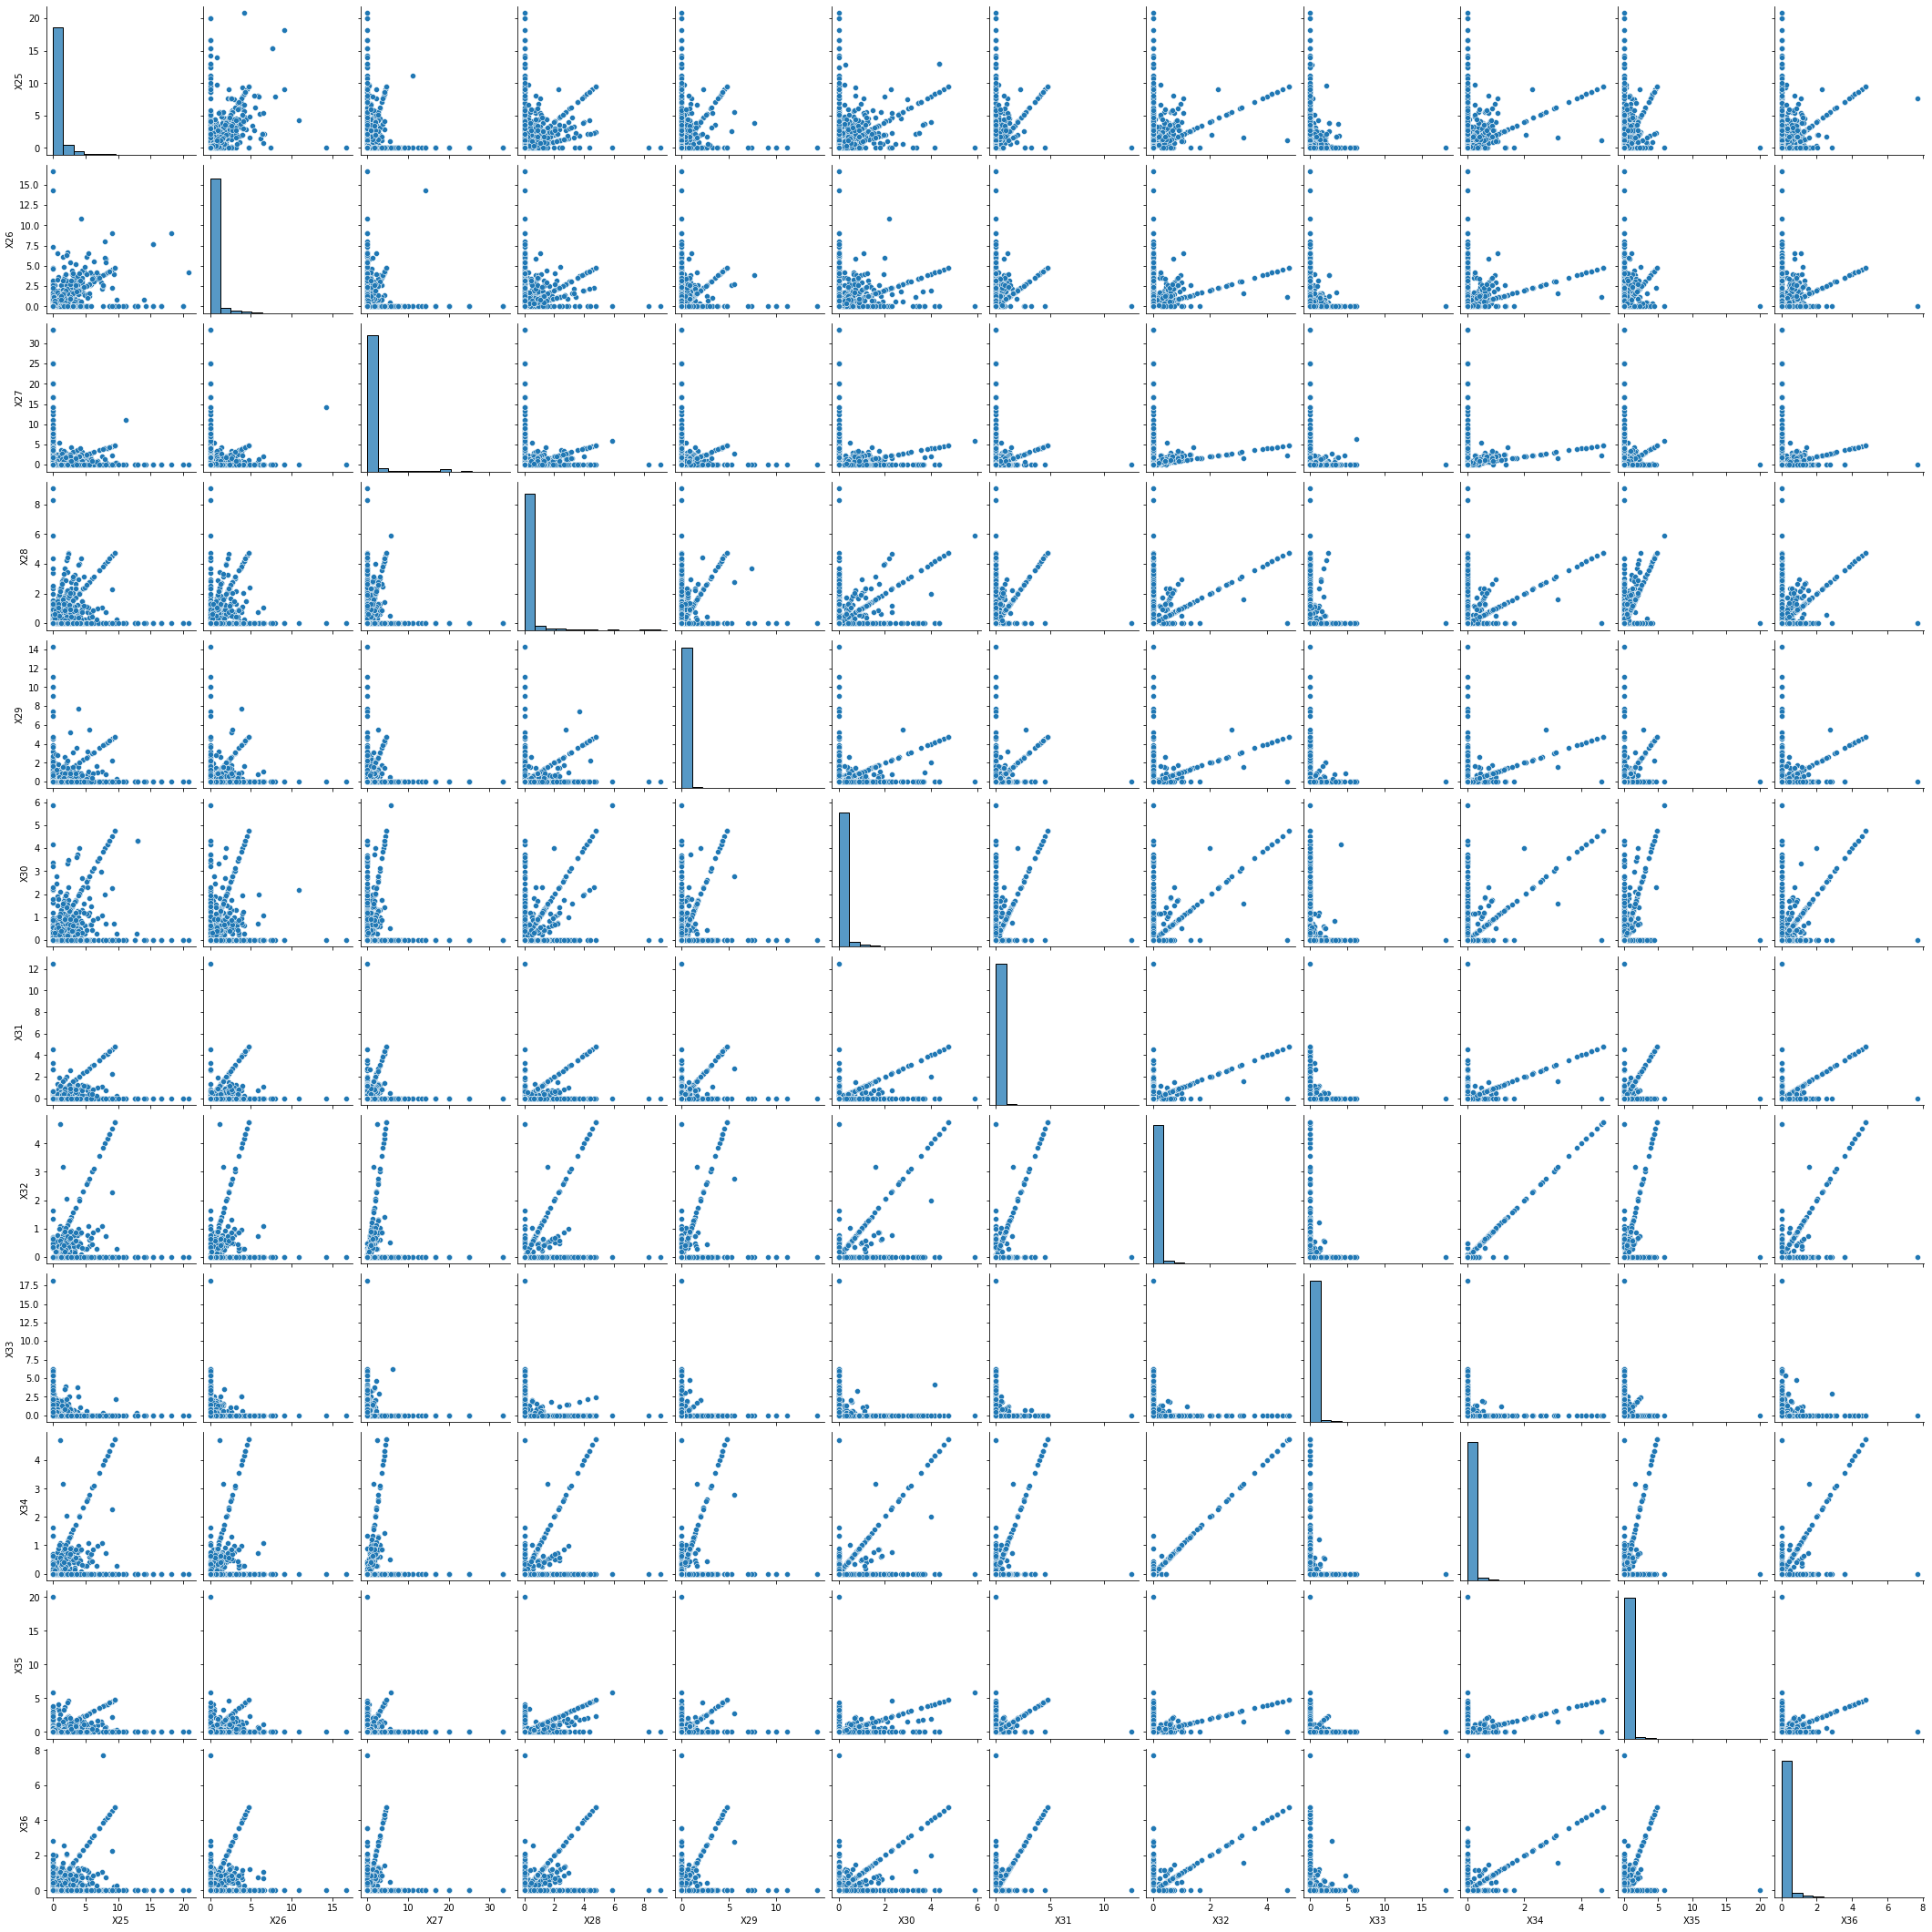

In [14]:
#CELL 14
""" scatter plots for visual correlation analysis for features X25 to X36 """


fig3 = plt.figure(figsize=(16,16));
sns.pairplot(data.iloc[:, 24:36],palette='Set3');


<Figure size 1152x1152 with 0 Axes>

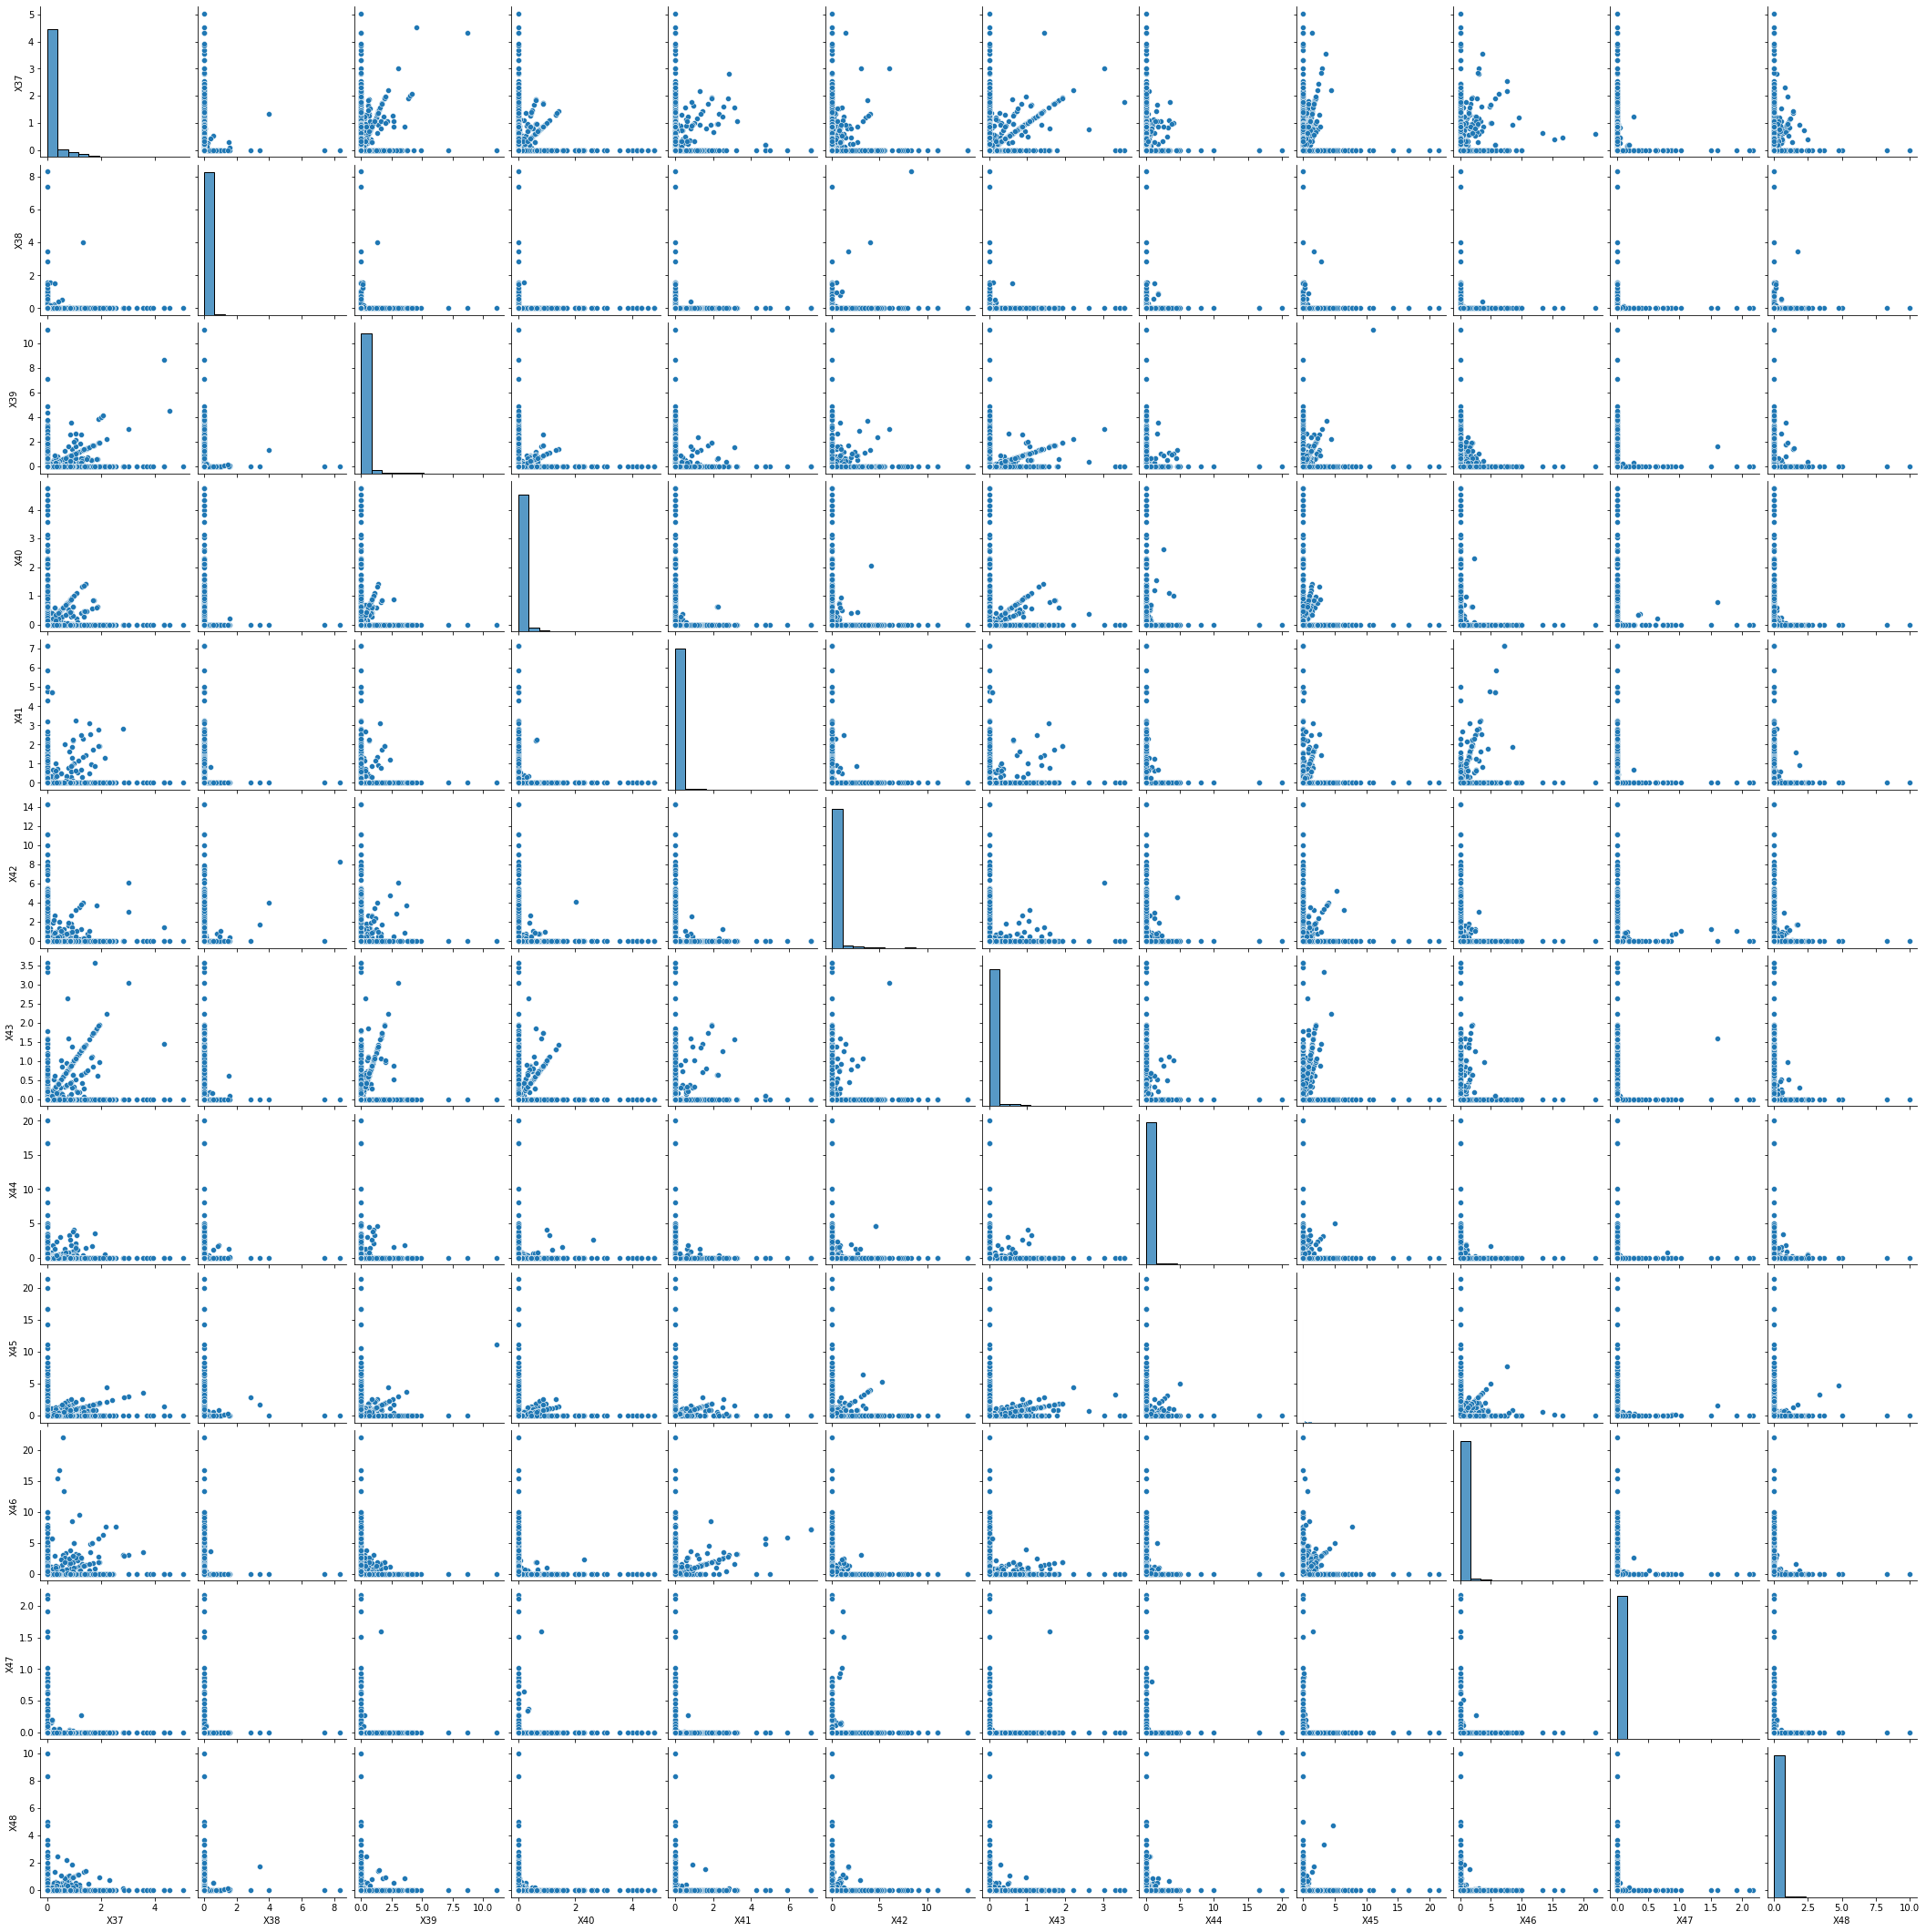

In [15]:
#CELL 15

""" scatter plots for visual correlation analysis for features X37 to X48 """

fig4 = plt.figure(figsize=(16,16));
sns.pairplot(data.iloc[:, 36:48],palette='Set4');


<Figure size 1152x1152 with 0 Axes>

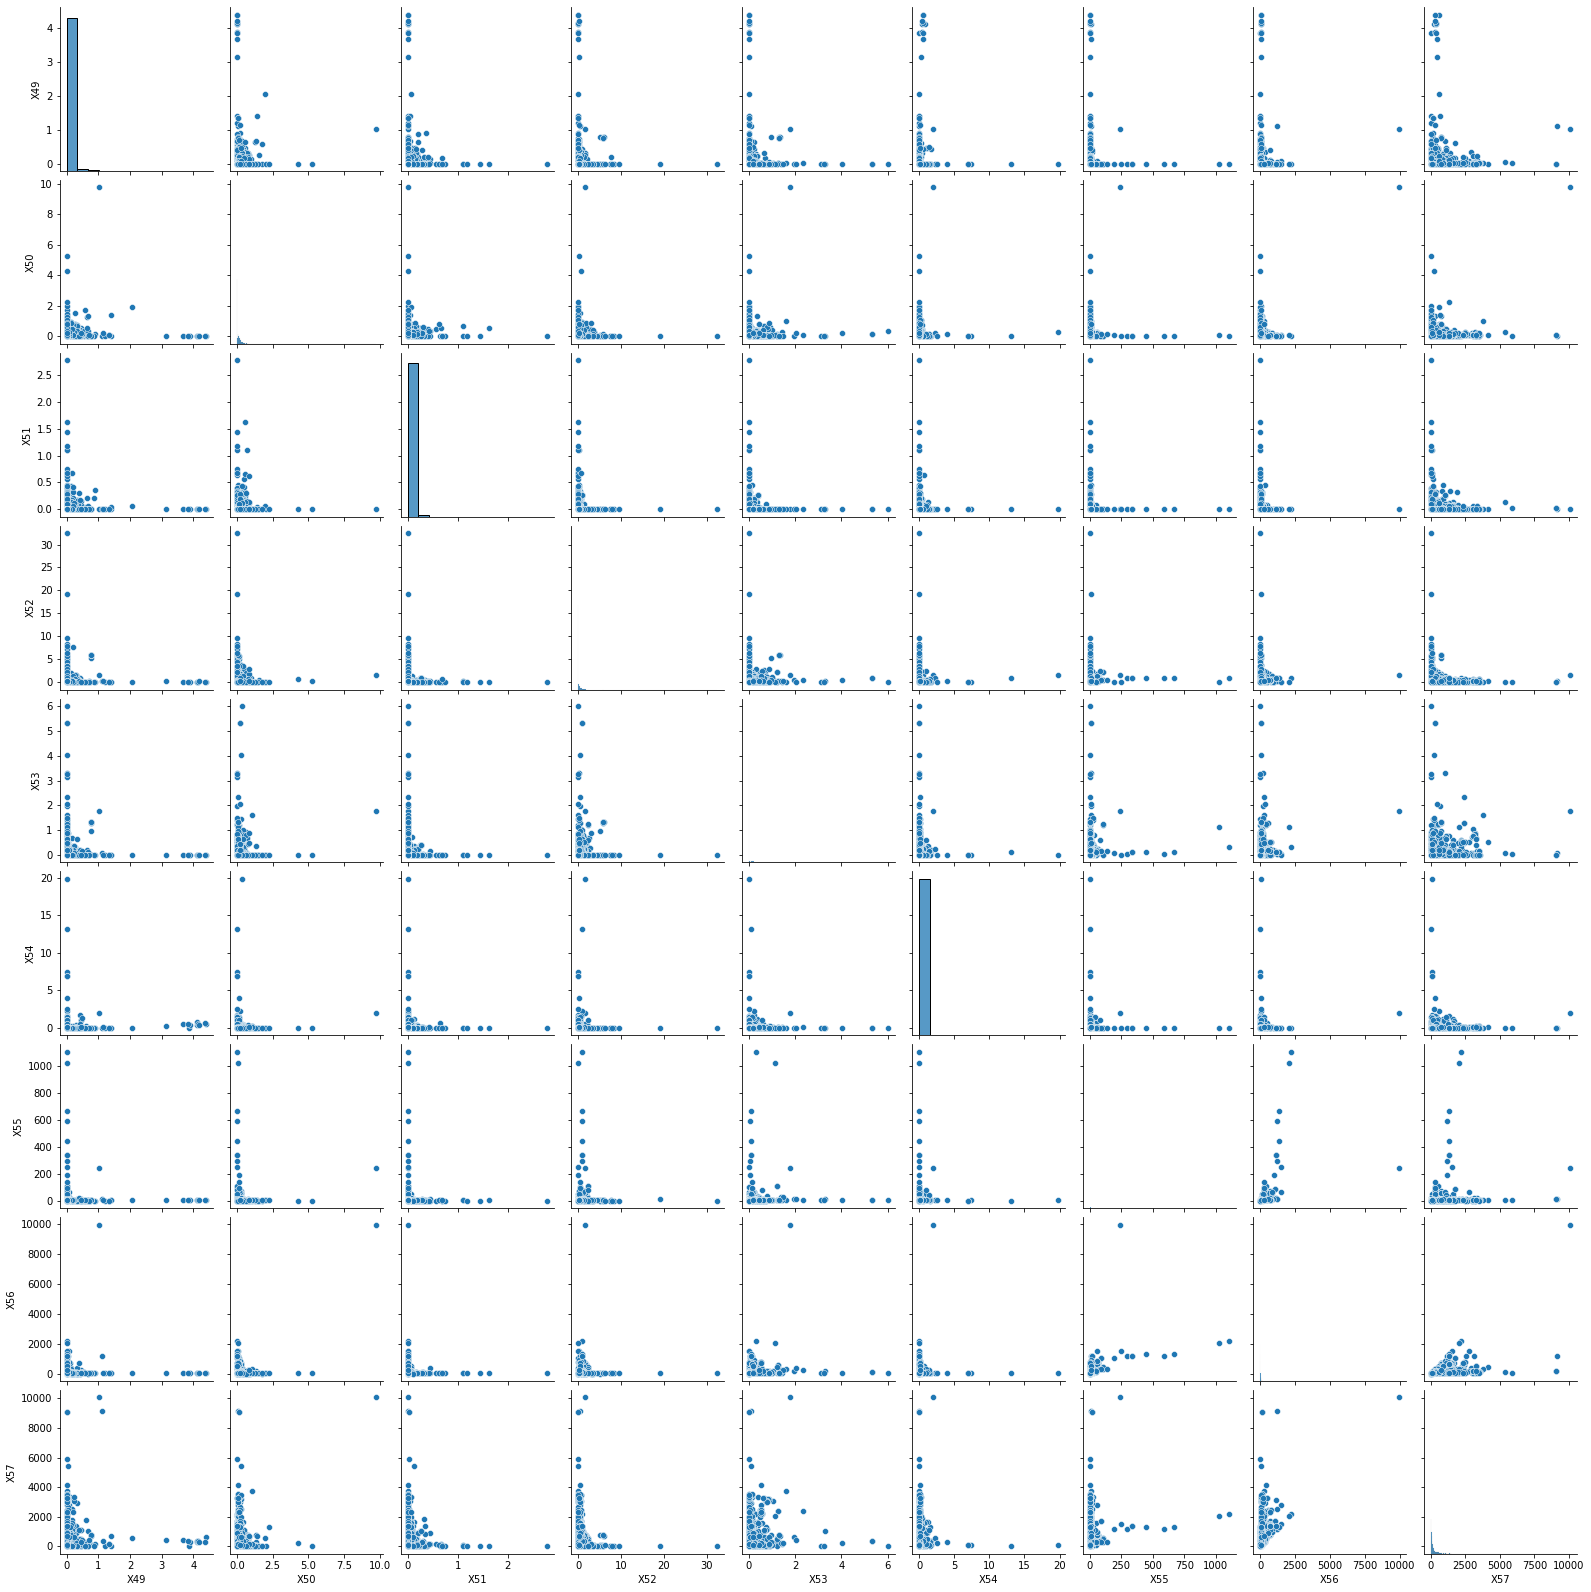

In [18]:
#CELL 16
"""scatter plots for visual correlation analysis for features X49 to X57"""

fig5 = plt.figure(figsize=(16,16));
sns.pairplot(data.iloc[:, 48:57],palette='Set5');

DATA PRE-PROCESSING 

Data consisting of the 57 predictor variables or features is standardised to bring all the features into a standard normal distribution before computing correlations between features

In [19]:
#CELL 17
"""separating predictor variables or features from responses or target labels """

predictors = data.iloc[:,0:57].copy()
print (type(predictors), predictors.shape)

label = data.iloc[:,-1].copy()
print (type(label), label.shape)
print (label.value_counts())

<class 'pandas.core.frame.DataFrame'> (3910, 57)
<class 'pandas.core.series.Series'> (3910,)
0    2376
1    1534
Name: Y, dtype: int64


In [20]:
#CELL 18

from sklearn.preprocessing import StandardScaler

def standardise_data(fit_to_data, raw_data):
  """
     standardise data to bring all variables in the same scale 

     Arguments:
          fit_to_data : data on which scaler is to be fit for standardisation (type:dataframe)
          raw_data : data to be standardised by scaler fitted on fit_to_data (type:dataframe)

     Returns:
          standardised data (type:dataframe)


  """
  scaler_var = StandardScaler()
  scaler_var.fit(fit_to_data)
  standardised_data = pd.DataFrame(scaler_var.transform(raw_data))
  return standardised_data


Dimensionality reduction is performed after standardisation as part of Data Pre-processing to decide on features based on variance captured by the features(sometimes also referred to as feature engineering).

In [21]:
#CELL 19

from sklearn.decomposition import PCA

def PCA_on_standardised_data(fit_to_standardised_data,standardised_data):
  """
  perform Principal Component Analysis(PCA) on standardised data 

  Arguments:
        fit_to_standardised_data : data on which the PCA is fit for dimensionality reduction
        standardised_data : data on which dimensionality reduction is performed

  Returns:
        dimensionally reduced data with features capturing (variance_threshold)% of ther variance in the data (type:dataframe)
  """
  variance_threshold = 0.95 # minimum percentage of variance to be described by the resulting transformed components
  pca_obj = PCA(n_components=variance_threshold) # Create PCA object
  pca_obj.fit(fit_to_standardised_data)
  data_transformed = pca_obj.transform(standardised_data) # Transform the initial features
  columns = ['comp_' + str(n) for n in range(1,data_transformed.shape[1]+1)] #create a list of columns
  data_after_PCA = pd.DataFrame(data_transformed, columns=columns) 
  return data_after_PCA


Features obtained after PCA show no correlation and now can be reliably engineered into relevant data types to be used for model training and validation. 

In [22]:
#CELL 20
"""Describing models for the binary classifier   """

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

model_names = ['Logistic_Regression', 'K_NN', 'Random_Forest', 'Gradient_Boosting']
model_description_dict = {
               'Logistic_Regression': LogisticRegression(class_weight='auto'),
               'K_NN': KNeighborsClassifier(n_neighbors=5, weights='distance'),
               'Decision_Tree' : DecisionTreeClassifier(),
               'Support_Vector_Machine' :  SVC(),
               'Random_Forest': RandomForestClassifier(n_estimators=50, class_weight='balanced'),
               'Gradient_Boosting': GradientBoostingClassifier(max_depth=5)
               }
n_trials = 25
test_ratio = 0.2
train_ratio = 0.8



Six different classifiers have been defined and tested before selecting the Random Forest Classifier based on the value of the computed metrics. The classifiers tested out are :
1)Logistic Regression
2)K-Nearest Neighbours
3)Decision Trees
4)Support Vector Machines
5)Random Forest
6)Gradient Boosting

In [40]:
#CELL 21

""" run classifier models on training and validation data split in the ratio 4:1 """

import sys
from IPython.display import clear_output
score_list = []
for i, (classifier_name, classifier) in enumerate(model_description_dict.items()):
  for trial in range(n_trials):
    train_data, validation_data, train_labels, validation_labels = train_test_split(predictors, label, test_size = test_ratio)

    ### standardising training set and reducing dimensionality
    standardised_train_data = standardise_data(train_data, train_data)
    train_data_after_PCA = PCA_on_standardised_data(standardised_train_data, standardised_train_data)

    data_for_classifier = train_data_after_PCA.copy()
    labels_for_classifier = train_labels.copy()


    ##standardising validation set and reducing dimensionality
    standardised_validation_data = standardise_data(train_data, validation_data)
    validation_data_after_PCA = PCA_on_standardised_data(standardised_train_data, standardised_validation_data)
    
    ##training model on standardised and dimensionally reduced training set 
    classifier.fit(data_for_classifier, labels_for_classifier)

    ## performing predictions using trainer classifier on validation set
    predicted_labels = classifier.predict(validation_data_after_PCA)

    ## computing performance metrics on validation set
    precision = precision_score(validation_labels, predicted_labels, average='binary')
    score_list.append([classifier_name, precision, 'Precision'])
    recall = recall_score(validation_labels, predicted_labels, average='binary')
    score_list.append([classifier_name, recall,'Recall'])
    F1 = f1_score(validation_labels, predicted_labels, average='binary')
    score_list.append([classifier_name, F1,'f1 Score'])
    accuracy = accuracy_score(validation_labels, predicted_labels)
    score_list.append([classifier_name, accuracy,'Accuracy'])
    if (trial+1)%5==0:
      print ((trial+1)*4) 
      clear_output()

Text(0.5, 1.0, 'Comparison of Classifier Metrics')

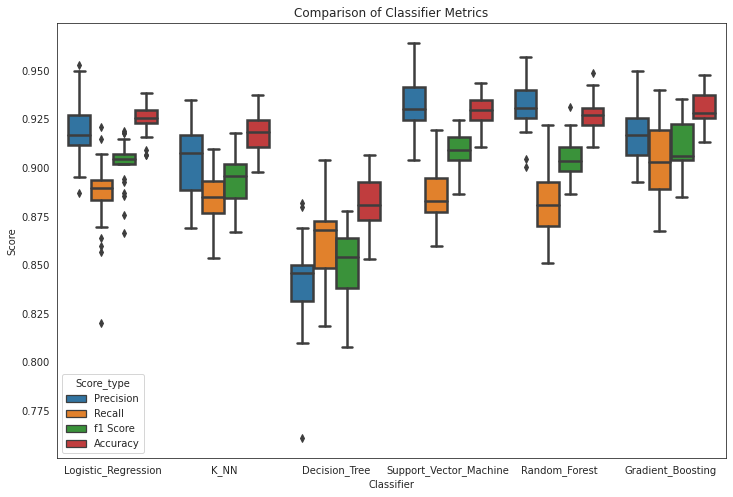

In [41]:
#CELL 22
""" plot performance metrics of different classifiers for comparison"""

metrics_data = pd.DataFrame(score_list, columns=['Classifier','Score','Score_type']) #building a dataframe with various metrics
plt.figure(figsize=(12,8))
ax = sns.boxplot(x="Classifier", y="Score", hue="Score_type", data=metrics_data, linewidth=2.5) #producing the boxplot
ax.set_title('Comparison of Classifier Metrics')

As can be inferred from the plot above, SVM, Random Forest and Gradient Boosting Classifiers are almost at par. But owing to the higher median values for the f1-score and other metrics(even though marginally higher)for the SVM classifier, the larger spread of the metrics can be accomodated and this model can be taken down for further validation but a subsequent analysis has been done before validating the model . A comparison using pivot tables for the three competing models has also been done. 

In [43]:
#CELL 24

def plot_confusion_matrix(CM, labels, Cmap=plt.cm.Blues, Title='Confusion Matrix'):
  """ 
  Plots the confusion matrix or pivot table  with colors instead of numbers
  
  Arguments: 
          Confusion Matrix
          Vector of labels
          Colormap
          Title of plot
    
  Returns:
           Confusion matrix plot
"""	
  plt.figure(figsize=(7,5))
  plt.imshow(CM, interpolation='nearest', cmap=Cmap) #create the graph and set the interpolation
  plt.title(Title) #adding the title
  plt.colorbar() #additing the colorbar
  tick_marks = np.arange(len(labels)) #defininig the tick marks
  plt.xticks(tick_marks, labels) #apply the labels to marks
  plt.yticks(tick_marks, labels) #apply the labels to marks
  plt.ylabel('True label') #adding the y-axis title
  plt.xlabel('Predicted label') #adding the x-axis title

(3128, 48)
training and valiudation shape  (3128, 48) (782, 48)
Metrics for Support_Vector_Machine
Recall =  0.88
Precision =  0.92
F1-score = 0.90
Accuracy =  0.92
Metrics for Random_Forest
Recall =  0.86
Precision =  0.92
F1-score = 0.89
Accuracy =  0.92
Metrics for Gradient_Boosting
Recall =  0.88
Precision =  0.93
F1-score = 0.90
Accuracy =  0.93


<Figure size 432x288 with 0 Axes>

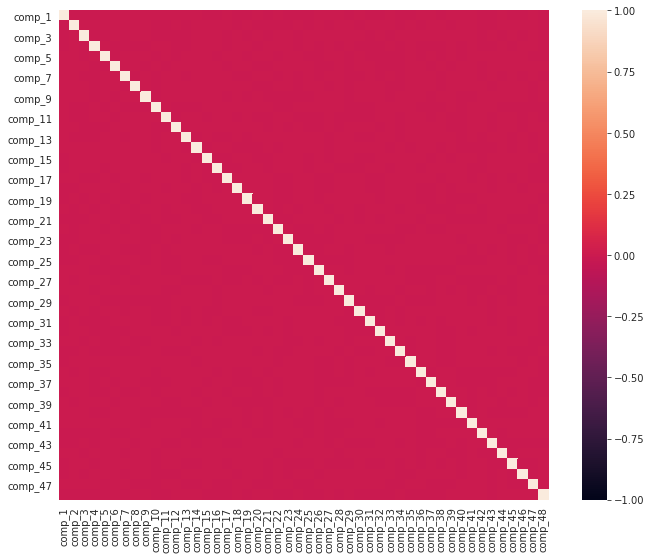

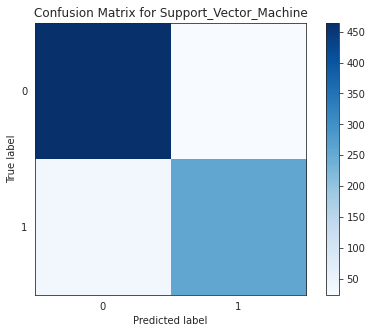

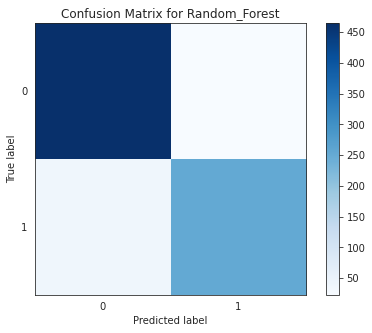

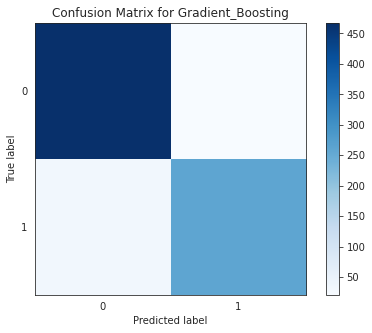

In [68]:
#CELL 25

""" split dataset and process it for the classifier """
train_data, validation_data, train_labels, validation_labels = train_test_split(predictors, label, test_size = test_ratio)

## standardising training set and reducing dimensionality
standardised_train_data = standardise_data(train_data, train_data)
train_data_after_PCA = PCA_on_standardised_data(standardised_train_data, standardised_train_data)

heatmap_from_corrmatrix(train_data_after_PCA) # correlation matrix to visualise non-correlation between dimensionally reduced components

data_for_classifier = train_data_after_PCA.copy()
labels_for_classifier = train_labels.copy()
print (data_for_classifier.shape)

##standardising validation set and reducing dimensionality
standardised_validation_data = standardise_data(train_data, validation_data)
validation_data_after_PCA = PCA_on_standardised_data(standardised_train_data, standardised_validation_data)
print ("training and valiudation shape ", data_for_classifier.shape, validation_data_after_PCA.shape)


def validate_model(model_name):
  """
  Validating competing models Random Forest and Gradient Boosting on validation set

  Arguments:
          model_name : name of classifier to be validated (type : string)

  Returns:
          None
  prints Recall and F1-score of the (model_name) Classifier and plots the confusion matrix
  """

  classifier = model_description_dict.get(model_name)
  
  classifier.fit(data_for_classifier, labels_for_classifier)
  
  predicted_labels = classifier.predict(validation_data_after_PCA)

  confusion_matrx = confusion_matrix(validation_labels, predicted_labels,np.unique(train_labels)) #building the confusion matrix
  labels = np.unique(train_labels.astype(int).astype(str)).tolist() #extracting the labels
  sns.set_style('white') #setting the plotting style
  plot_confusion_matrix(confusion_matrx, labels, Cmap=plt.cm.Blues, Title=f'Confusion Matrix for {model_name}') #calls the confusion matrix routine with the test set and prediction set
  precision = precision_score(validation_labels, predicted_labels, average='binary')
  recall = recall_score(validation_labels, predicted_labels, average='binary')
  F1 = f1_score(validation_labels, predicted_labels, average='binary')
  accuracy = accuracy_score(validation_labels, predicted_labels)
  print (f'Metrics for {model_name}')
  print ('Recall = ', '{:.2}'.format(recall))
  print ('Precision = ', '{:.2f}'.format(precision))
  print ('F1-score =', '{:.2f}'.format(F1))
  print ('Accuracy = ', '{:.2f}'.format(accuracy))

  return classifier 

svm_model = validate_model("Support_Vector_Machine")
random_forest_model = validate_model("Random_Forest")
gradient_boost_model = validate_model("Gradient_Boosting")


From the cell output above, it can be inferred that Gradient Boosting classifier even though with a slightly lower precision-score than the SVM model is still the better model because of the higher f1-score. The interpretation is premised on the understanding that the f1-score accounts for both the competing metrices recall and precision and so is a more reliable metric. 

The Gradient Boosting classifier is now taken further for subsequent validation. 

In [75]:
#CELL 26

def cross_valid_roc(data, labels, Classifier, Folds = (int), Title = ''):
  """
  generate Receiver Operating Characteristic metric and Area Under ROC Curve 

  Arguments:
          data : dataset on which classification task has been performed (type : dataframe)
          labels : target labels for the features described by 'data' above (type : dataframe)
          Classifier : model for classification (type : object)
          Folds : number of sets into which the dataset is split for cross-validation (type : int)

  Returns:
        None
  
  Plots ROC-AUC curve 
   """

  from scipy import interp
  from sklearn import svm, datasets
  from sklearn.metrics import roc_curve, auc
  from sklearn.model_selection import StratifiedKFold

  # Run classifier with cross-validation and plot ROC curves
  # skf = StratifiedKFold(n_splits=Folds)
  # skf.get_n_splits(data_for_classifier, labels_for_classifier)
    
  mean_true_pos_rate = 0.0
  mean_false_pos_rate = np.linspace(0, 1, 100)
  all_true_pos_rate = []

  # split = 1
  # for  train_idx_after_split, test_idx_after_split in skf.split(data_for_classifier, labels_for_classifier):
  #     pred_labels = Classifier.fit(data[train_idx_after_split[0]:], labels[train_idx_after_split[0]:]).predict(data[test_idx_after_split[0]:])
  #     fpr, tpr, thresholds = roc_curve(labels[test_idx_after_split[0]:], pred_labels)
  #     mean_true_pos_rate += interp(mean_false_pos_rate, fpr, tpr)
  #     mean_true_pos_rate[0] = 0.0
  #     roc_auc = auc(fpr, tpr)
  #     plt.plot(fpr, tpr, lw=1, label='ROC fold %d (area = %0.2f)' % (split, roc_auc))
  #     split+= 1
	
  Classifier = gradient_boost_model
  pred_labels = Classifier.predict(validation_data_after_PCA)
  fpr, tpr, thresholds = roc_curve(validation_labels, pred_labels)
  mean_true_pos_rate += interp(mean_false_pos_rate, fpr, tpr)
  mean_true_pos_rate[0] = 0.0
  roc_auc = auc(fpr, tpr)
  plt.plot(fpr, tpr, lw=1, label='ROC(area = %0.2f)' % (roc_auc))

  mean_true_pos_rate /= len(validation_data)
  
  # mean_true_pos_rate /= len(train_idx_after_split)
  mean_true_pos_rate[-1] = 1.0
  # mean_auc = auc(mean_false_pos_rate, mean_true_pos_rate)
  # plt.plot(mean_false_pos_rate, mean_true_pos_rate, 'k--', label='Mean ROC (area = %0.2f)' % mean_auc, lw=2)

  plt.xlim([-0.05, 1.05])
  plt.ylim([-0.05, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title(Title)
  plt.legend(loc="lower right")

I have also performed a 5-fold stratified cross validation which maintains the same proportion of each of the two classes in each fold(split of data into subsets of data) . However, since this was beyond the scope of the intended approach, I have commented that part of the code. 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:45: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


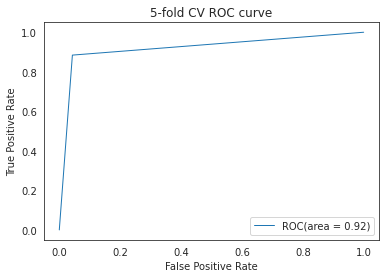

In [76]:
#CELL 27
""" call function to generate ROC-AUC curve on predicted labels from cross-validation"""

cross_valid_roc(validation_data_after_PCA, validation_labels,classifier, Folds = 2, Title = '5-fold CV ROC curve') 
plt.show()

Since the ROC-AUC curve gives an AUC value of 0.92, the model is considered to be a good classifier and is hence validated.

In [46]:
#CELL 28

test_data = pd.read_csv(test_file_path)
test_data = test_data.drop('Unnamed: 0', axis=1)
test_data.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,X44,X45,X46,X47,X48,X49,X50,X51,X52,X53,X54,X55,X56,X57
0,0.70,0.0,0.70,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.83,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.41,1.41,0.0,0.0,0.0,0.000,0.0,0.105,0.000,0.000,2.342,47,89
1,0.00,0.0,0.84,0.0,0.84,0.00,0.84,0.00,0.00,0.00,0.00,0.00,0.84,0.00,0.00,0.00,0.00,0.00,2.54,0.0,1.69,0.0,0.00,0.84,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.388,0.0,0.776,0.129,0.000,10.375,168,249
2,0.46,0.3,0.46,0.0,0.05,0.12,0.05,0.28,0.43,0.74,0.25,0.97,0.56,1.23,0.00,0.25,0.43,0.02,3.22,0.0,1.46,0.0,1.05,0.36,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.02,0.00,0.0,0.0,0.0,0.065,0.0,0.325,0.756,0.153,5.891,193,3040
3,0.10,0.2,1.01,0.0,0.80,0.80,0.50,0.00,0.80,0.10,0.30,0.70,0.30,0.00,1.61,0.10,0.00,1.11,1.31,0.2,0.70,0.0,0.60,0.10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.0,0.10,0.10,0.0,0.0,0.0,0.110,0.0,0.490,0.158,0.015,8.550,669,1351
4,0.00,0.0,0.72,0.0,0.72,0.00,0.72,0.00,0.00,0.00,0.00,0.00,0.72,0.00,0.00,0.00,0.00,0.00,1.45,0.0,1.45,0.0,0.00,0.72,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.364,0.0,0.729,0.121,0.000,7.781,32,249


In [47]:
#CELL 29
""" descriptive statistics on test data"""

test_data.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,X44,X45,X46,X47,X48,X49,X50,X51,X52,X53,X54,X55,X56,X57
count,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.00000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000
mean,0.113401,0.250333,0.259363,0.084385,0.317395,0.095485,0.124891,0.101071,0.083965,0.211505,0.054255,0.473893,0.092894,0.066671,0.052938,0.261577,0.141491,0.180391,1.668669,0.095181,0.761708,0.172634,0.103357,0.089001,0.457352,0.258119,0.824935,0.122200,0.09097,0.089146,0.058495,0.049797,0.113907,0.050246,0.088423,0.115687,0.148119,0.011722,0.069247,0.063459,0.036353,0.093618,0.037554,0.063401,0.233734,0.163763,0.001997,0.023878,0.044698,0.137774,0.023201,0.247001,0.064440,0.046559,6.008399,51.237337,284.591896
std,0.352256,1.481908,0.502791,1.533871,0.758769,0.335553,0.402284,0.414537,0.316430,0.499598,0.193042,0.770257,0.287302,0.460284,0.278251,0.962487,0.443760,0.556946,1.860817,0.799695,1.146614,1.206941,0.374469,0.438095,1.259678,0.854455,3.617189,0.495914,0.50045,0.409787,0.368296,0.364195,0.647490,0.364229,0.406143,0.442055,0.497177,0.249035,0.491256,0.367637,0.267692,0.536883,0.177095,0.407094,0.637226,0.690451,0.031495,0.169886,0.286601,0.234006,0.200352,0.508129,0.169546,0.258931,33.560544,128.150540,745.764420
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,2.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.606000,6.000000,34.500000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.220000,0.000000,0.160000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.055000,0.000000,0.004000,0.000000,0.000000,2.285000,15.000000,99.000000
75%,0.000000,0.000000,0.360000,0.000000,0.375000,0.000000,0.000000,0.000000,0.000000,0.120000,0.000000,0.700000,0.000000,0.000000,0.000000,0.085000,0.000000,0.000000,2.660000,0.000000,1.255000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.090000,0.000000,0.000000,0.000000,0.000000,0.189000,0.000000,0.307500,0.038000,0.000000,3.676500,46.000000,271.500000
max,4.540000,14.280000,5.100000,35.46

In [70]:
#CELL 30
""" standardisation and dimensionality reduction on test data using scaler and PCA object fitted on training data distribution """

standardised_test_data = standardise_data(standardised_train_data, test_data)
standardised_test_data.describe()

test_data_after_PCA = PCA_on_standardised_data(standardised_train_data,standardised_test_data)



The test data has been standardised with a scaler that is fitted on the training data and subsequently dimensionally reduced using the PCA object created for the training set.

In [72]:
#CELL 31 (UNIQUE IDENTIFIER - PLEASE DONT DELETE)
""" preform prediction on standardised test set after feature extraction using PCA 
    use this cell to perform predictions using trained model that has been validated in cell 26 onwards"""

test_set_preds = gradient_boost_model.predict(test_data_after_PCA)
print (test_set_preds)



[1 0 0 0 0 1 0 1 1 0 0 1 0 0 0 1 1 1 0 1 0 0 0 0 1 1 1 1 1 1 1 1 0 1 0 0 1
 0 0 0 0 1 1 1 1 1 1 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 1 0 1 0 1 1 0 0 1 1
 1 1 0 0 0 1 1 0 1 1 1 0 1 0 1 1 1 1 1 1 0 1 1 1 0 0 0 0 1 1 0 1 0 0 0 0 0
 0 1 0 0 1 0 1 1 1 0 0 0 1 1 0 1 1 0 0 0 0 0 0 0 1 1 0 1 0 1 1 1 0 0 1 1 0
 0 0 1 0 0 0 0 1 0 1 0 0 0 1 0 1 0 0 1 1 1 0 0 0 1 0 0 1 0 1 0 0 1 1 1 0 1
 1 1 0 1 0 1 1 0 0 0 0 0 1 0 0 1 1 0 0 1 0 1 0 0 0 0 0 1 1 0 1 0 1 1 0 1 0
 1 1 0 1 0 1 1 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 1 1 0 0 0 0 1 0 1 0 0 1 0 1 0
 0 1 0 1 1 1 1 1 1 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 1 0 0 1 0 0 1 1 1 0 0 0 0
 1 0 1 0 0 0 0 1 1 1 1 0 1 0 0 0 1 1 1 1 0 1 1 1 0 1 1 0 0 0 0 0 0 0 0 0 1
 1 1 0 0 1 1 1 1 0 1 0 1 1 0 0 1 0 1 0 1 0 0 0 0 0 0 0 1 1 0 0 1 1 0 1 1 0
 0 0 1 0 1 1 0 1 0 1 0 1 1 1 0 1 0 1 0 0 1 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 1
 0 0 1 1 0 0 1 0 0 0 1 1 0 1 0 1 1 1 1 0 1 0 1 0 1 1 1 1 1 1 0 1 0 0 0 0 0
 1 1 1 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1 1 1 0 1 1 0 1 1 0 1 0 1 1 0 0 0 0 1 0
 1 0 1 0 1 0 0 0 1 0 1 1 

In [74]:
#CELL 32 
""" write predicted test labels onto csv file"""
(pd.DataFrame(test_set_preds)).to_csv("/content/drive/MyDrive/Arya_DataScientist_Assignment.zip (Unzipped Files)/test_set_labels.csv")